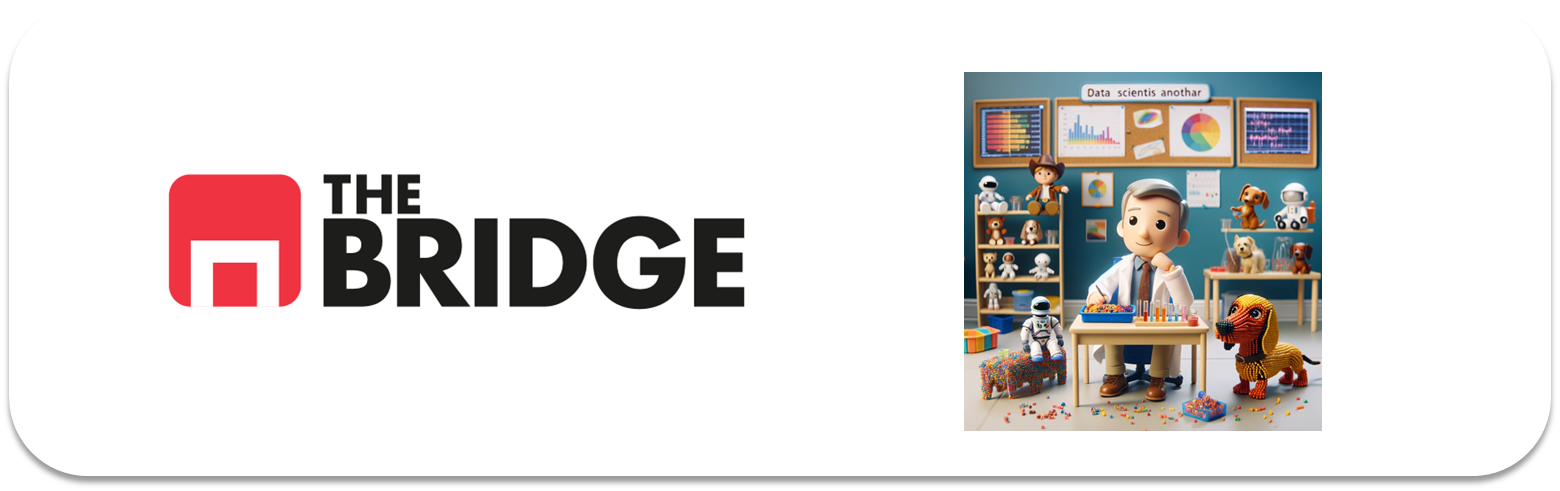

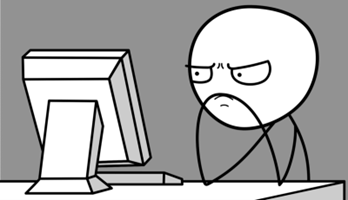

Para ejercitarte y afianzar lo aprendido sobre tendencias centrales, frecuencias, medidas de posición y rangos, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [91]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [92]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 4 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [93]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



In [94]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [95]:
df_admissions = pd.read_csv("./data/admission_data.csv")

In [96]:
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB


In [97]:
df_admissions.head(10)

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected
5,5,1973,Other,M,Rejected
6,6,1973,Department of Psychology,F,Accepted
7,7,1973,Other,M,Accepted
8,8,1973,Other,M,Rejected
9,9,1973,Department of Physics and Astronomy,M,Accepted


### Ejercicio 2

Como ya sabes este dataset queremos analizarlo para poder estudiar la posible discriminación en las admisiones de los departamentos universitarios. Analiza la variable `Year`, ¿qué crees que deberíamos hacer con esta variable?

In [98]:
columnas_numericas_admissions = df_admissions.describe().T.index.to_list()
print(columnas_numericas_admissions)

['Unnamed: 0', 'Year']


In [99]:
columnas_categoricas_admission = ["Major", "Gender", "Admission"]

In [100]:
df_admissions["Year"].value_counts()

Year
1973    12763
Name: count, dtype: int64

In [101]:
df_admissions["Year"] = pd.to_datetime(df_admissions["Year"], format="%Y")
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  12763 non-null  int64         
 1   Year        12763 non-null  datetime64[ns]
 2   Major       12763 non-null  object        
 3   Gender      12763 non-null  object        
 4   Admission   12763 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 498.7+ KB


In [102]:
df_admissions["Year"].describe()

count                  12763
mean     1973-01-01 00:00:00
min      1973-01-01 00:00:00
25%      1973-01-01 00:00:00
50%      1973-01-01 00:00:00
75%      1973-01-01 00:00:00
max      1973-01-01 00:00:00
Name: Year, dtype: object

### Ejercicio 3

Analiza ahora la columna `Major`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. Puedes emplear las funciones del notebook de visualizaciones del repo o bien la función `pinta_distribucion_categoricas` del módulo `bootcampviztools` y que hemos usado en el workout. (Tiene un argumento `relativa` para mostrar las frecuencias relativas y otro `mostrar_valores` para enseñar las etiquetas de los valores).

In [103]:
df_admissions.Major.describe()

count     12763
unique        7
top       Other
freq       7924
Name: Major, dtype: object

In [104]:
# Frecuencia absoluta de Major
df_admissions["Major"].value_counts()

Major
Other                                                      7924
Department of Physics and Astronomy                        1246
School of Medicine                                          918
Department of Mechanical Engineering                        792
Department of Psychology                                    714
Department of Economics                                     585
School of Political Science and International Relations     584
Name: count, dtype: int64

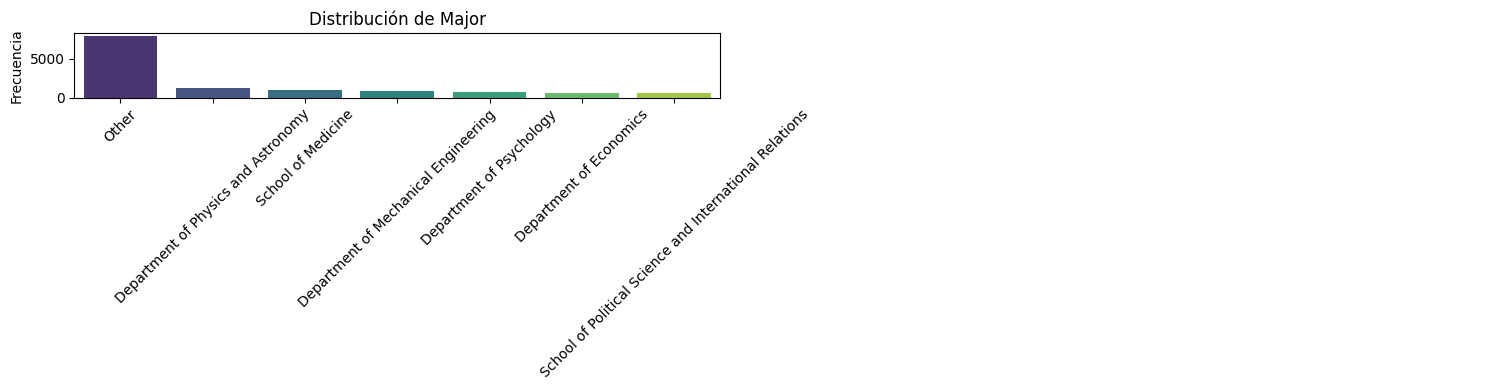

In [105]:
# Frecuencia absoluta de Major en gráfico
pinta_distribucion_categoricas(df_admissions, ["Major"])

In [106]:
# Frecuencia relativa de Major
df_admissions["Major"].value_counts(normalize=True)

Major
Other                                                      0.620857
Department of Physics and Astronomy                        0.097626
School of Medicine                                         0.071927
Department of Mechanical Engineering                       0.062054
Department of Psychology                                   0.055943
Department of Economics                                    0.045836
School of Political Science and International Relations    0.045757
Name: proportion, dtype: float64

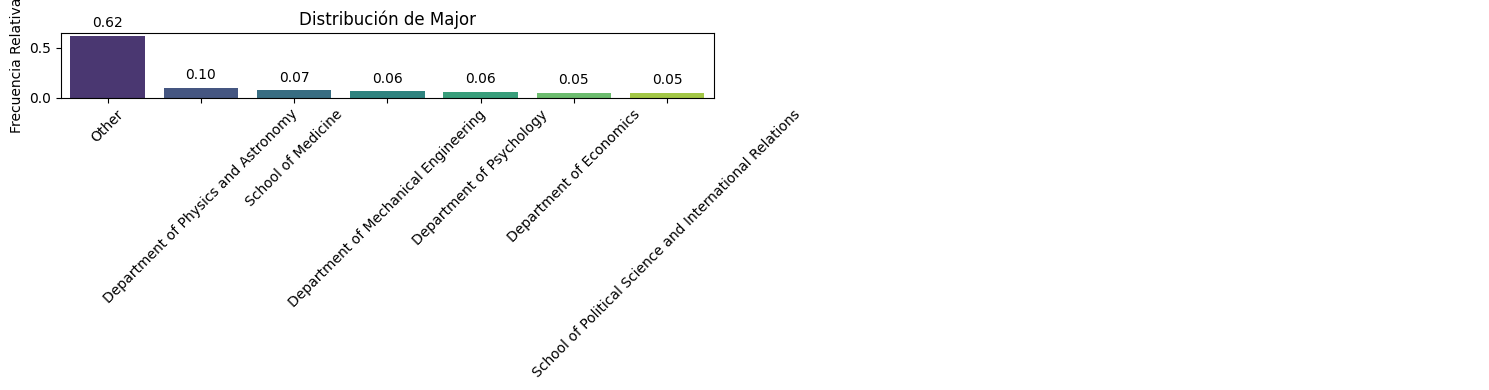

In [107]:
# Frencuencia relativa de Major en gráfico
pinta_distribucion_categoricas(df_admissions, ["Major"], relativa=True, mostrar_valores=True)

### Ejercicio 4

¿Qué puedes comentar de los datos anteriores?

Major esta altamente distribuida hacia un lado con un pico muy alto en 'other' en comparación con el resto. Los departamentos de ciencias, medicina, ingenieria (STEM) estan muy por debajo de la media. 

### Ejercicio 5

Analiza ahora la columna `Gender`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [108]:
df_admissions.Gender.describe()

count     12763
unique        2
top           M
freq       8442
Name: Gender, dtype: object

In [109]:
# Frecuencia absoluta de Gender
df_admissions["Gender"].value_counts()

Gender
M    8442
F    4321
Name: count, dtype: int64

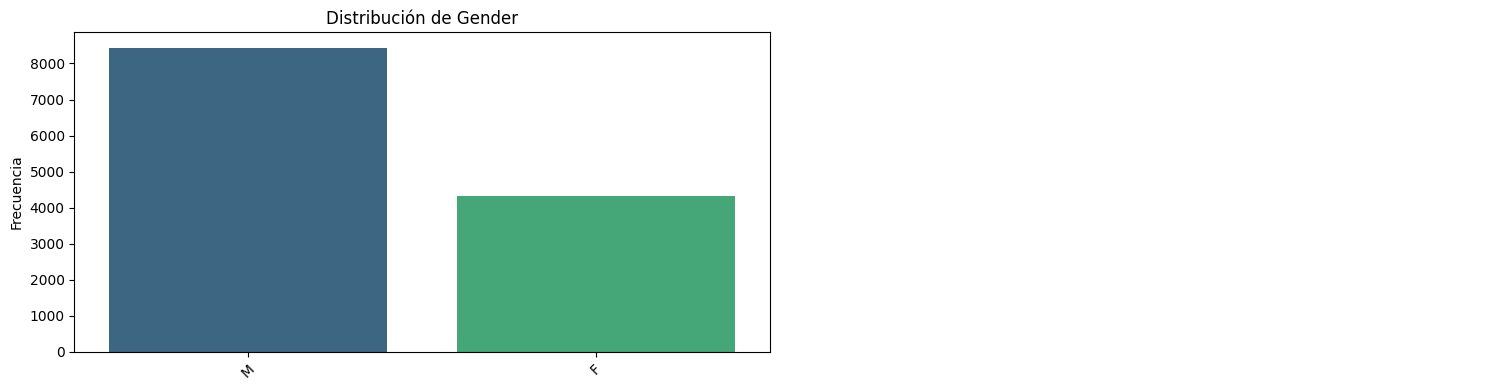

In [110]:
#Frecuencia absoluta de Gender en gráfico
pinta_distribucion_categoricas(df_admissions, ["Gender"])

In [111]:
# Frecuencia relativa de Gender
df_admissions["Gender"].value_counts(normalize=True)

Gender
M    0.661443
F    0.338557
Name: proportion, dtype: float64

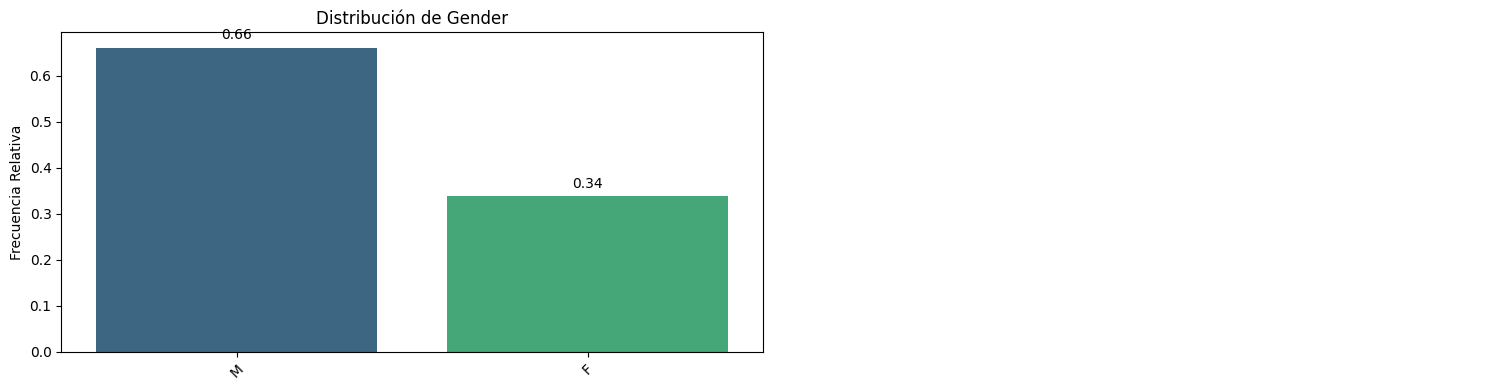

In [112]:
#Frecuencia relativa de Gender en gráfico
pinta_distribucion_categoricas(df_admissions, ["Gender"], relativa=True, mostrar_valores=True)

### Ejercicio 6

¿Qué puedes comentar de los datos anteriores?

Los datos revelan como 2/3 de los estudiantes son M mientras que solo 1/3 es F en general.

### Ejercicio 7

Finalmente analiza, la columna `Admission`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [113]:
df_admissions.Admission.describe()

count        12763
unique           2
top       Rejected
freq          7531
Name: Admission, dtype: object

In [114]:
# Frecuencia absoluta de Admission
df_admissions["Admission"].value_counts()

Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

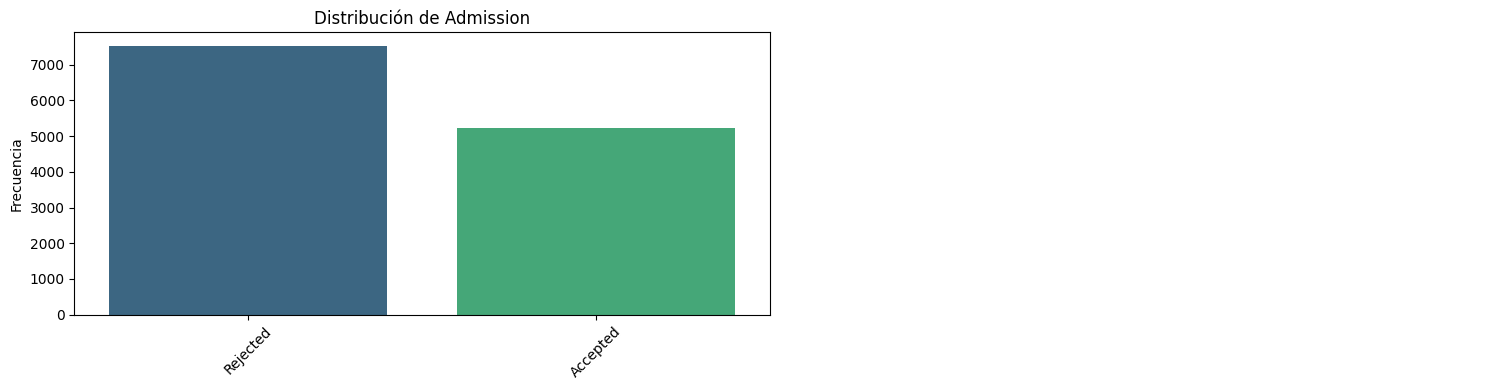

In [115]:
# Frecuencia absoluta de Admission en gráfico
pinta_distribucion_categoricas(df_admissions, ["Admission"])

In [116]:
# Frecuencia relativa de Admission
df_admissions["Admission"].value_counts(normalize=True)

Admission
Rejected    0.590065
Accepted    0.409935
Name: proportion, dtype: float64

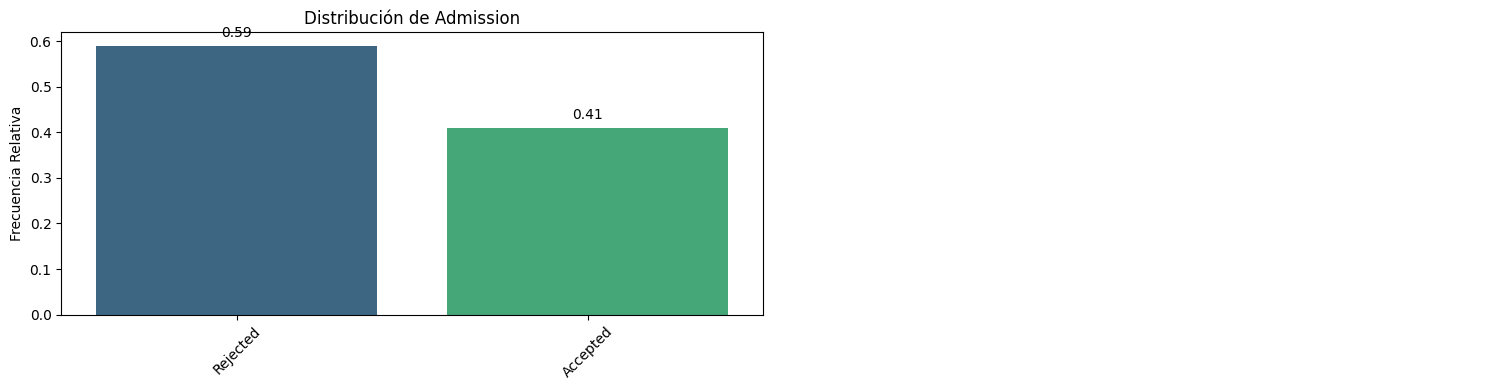

In [117]:
# Frecuencia relativa de Admission en gráfico
pinta_distribucion_categoricas(df_admissions, ["Admission"], relativa=True, mostrar_valores=True)

### Ejercicio 8

¿Qué puedes comentar de los datos anteriores?

El numero de estudiantes que es rechazado por Admissions es mayor por un 18% que los que son admitidos.


### Ejercicio 9

Carga en un dataframe los datos contenidos en la ruta "./data/tips.csv", muestra un parte de su contenido y la info general del mismo

In [118]:

df_tips = pd.read_csv("./data/tips.csv")
df_tips.head(10)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


In [119]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


### Ejercicio 10

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.

In [120]:
columnas_numericas_tips = df_tips.describe().T.index.to_list()
print(columnas_numericas_tips)

['Unnamed: 0', 'total_bill', 'tip', 'size']


In [121]:
df_tips.describe()

,Unnamed: 0,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


In [122]:
df_tips[columnas_numericas_tips].median()

Unnamed: 0    121.500
total_bill     17.795
tip             2.900
size            2.000
dtype: float64

### Ejercicio 11

Para completar el análisis incial de las variables numéricas, muestra el diagrama de caja (*boxplot*) para cada una de las variables numéricas del dataset. ¿Qué puedes decir de ellas? (Puedes emplear las funciones incluidas en el notebook de visualizaciones sencillas o la función `plot_multiple_boxplots` de `bootcampviztools`, y que hemos empleado en el workout)

In [123]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [124]:
get_IQR(df_tips, columnas_numericas_tips)

Unnamed: 0    121.5000
total_bill     10.7800
tip             1.5625
size            1.0000
dtype: float64

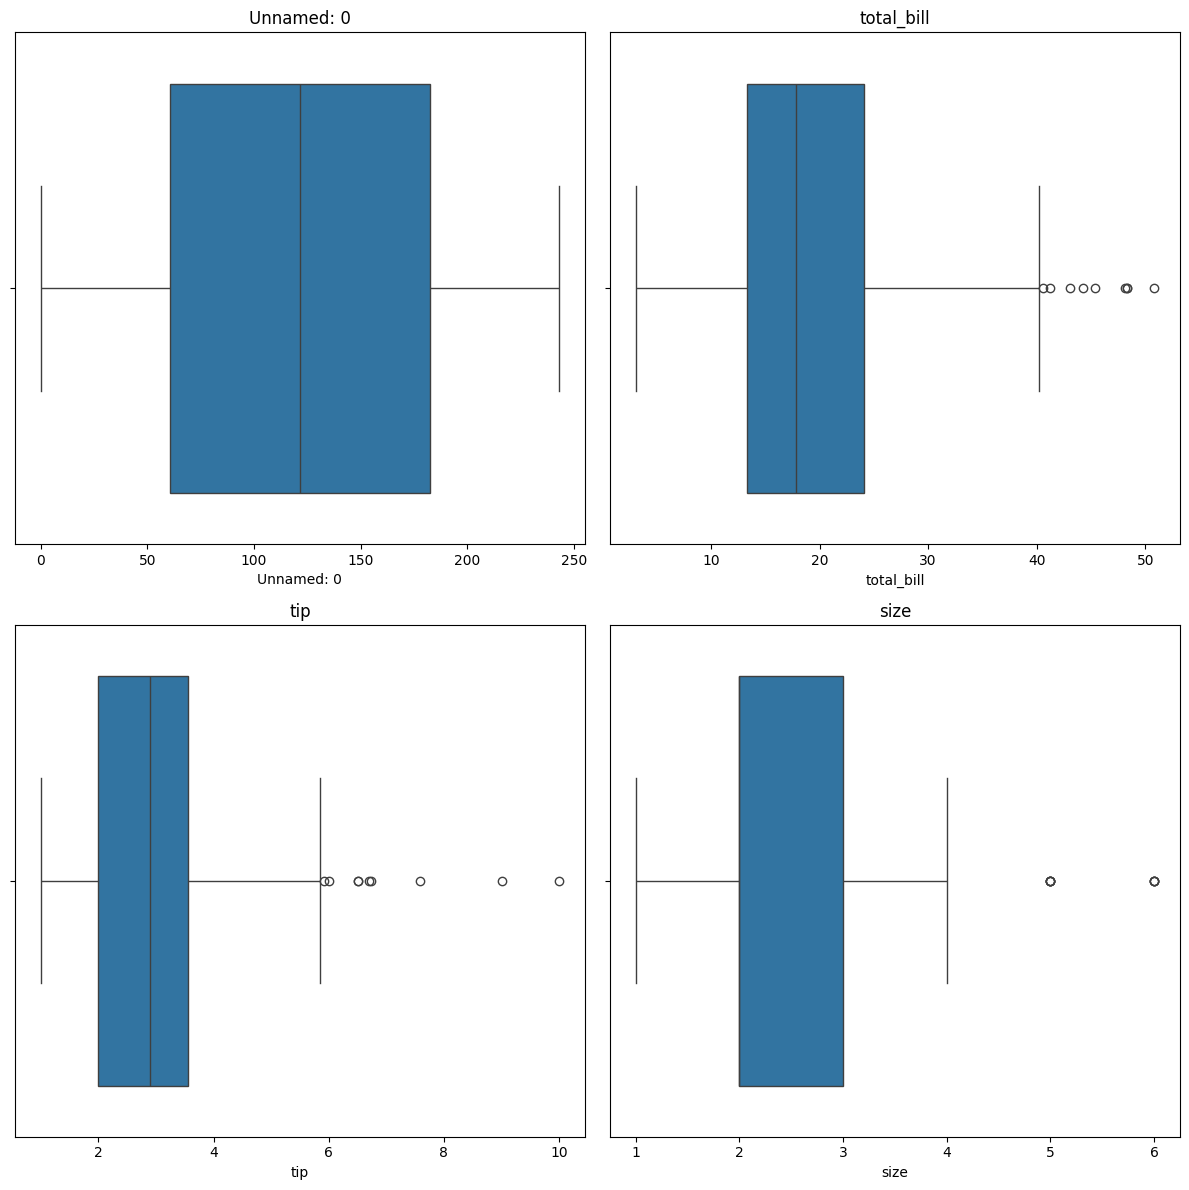

In [125]:
plot_multiple_boxplots(df_tips,columnas_numericas_tips, dim_matriz_visual=2)

### Ejercicio Extra #1:

Muestra las frecuencias absolutas y relativas de las variables categóricas del dataset. ¿Qué podrías destacar?

In [126]:
columnas_categoricas_tips = ["sex", "smoker", "day", "time"]

In [127]:
# Frecuencia absoluta de las variables categóricas

for catego in columnas_categoricas_tips:
    print(f"Para {catego}")
    print(df_tips[catego].value_counts())
    print("\n"*2)

Para sex
sex
Male      157
Female     87
Name: count, dtype: int64



Para smoker
smoker
No     151
Yes     93
Name: count, dtype: int64



Para day
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64



Para time
time
Dinner    176
Lunch      68
Name: count, dtype: int64





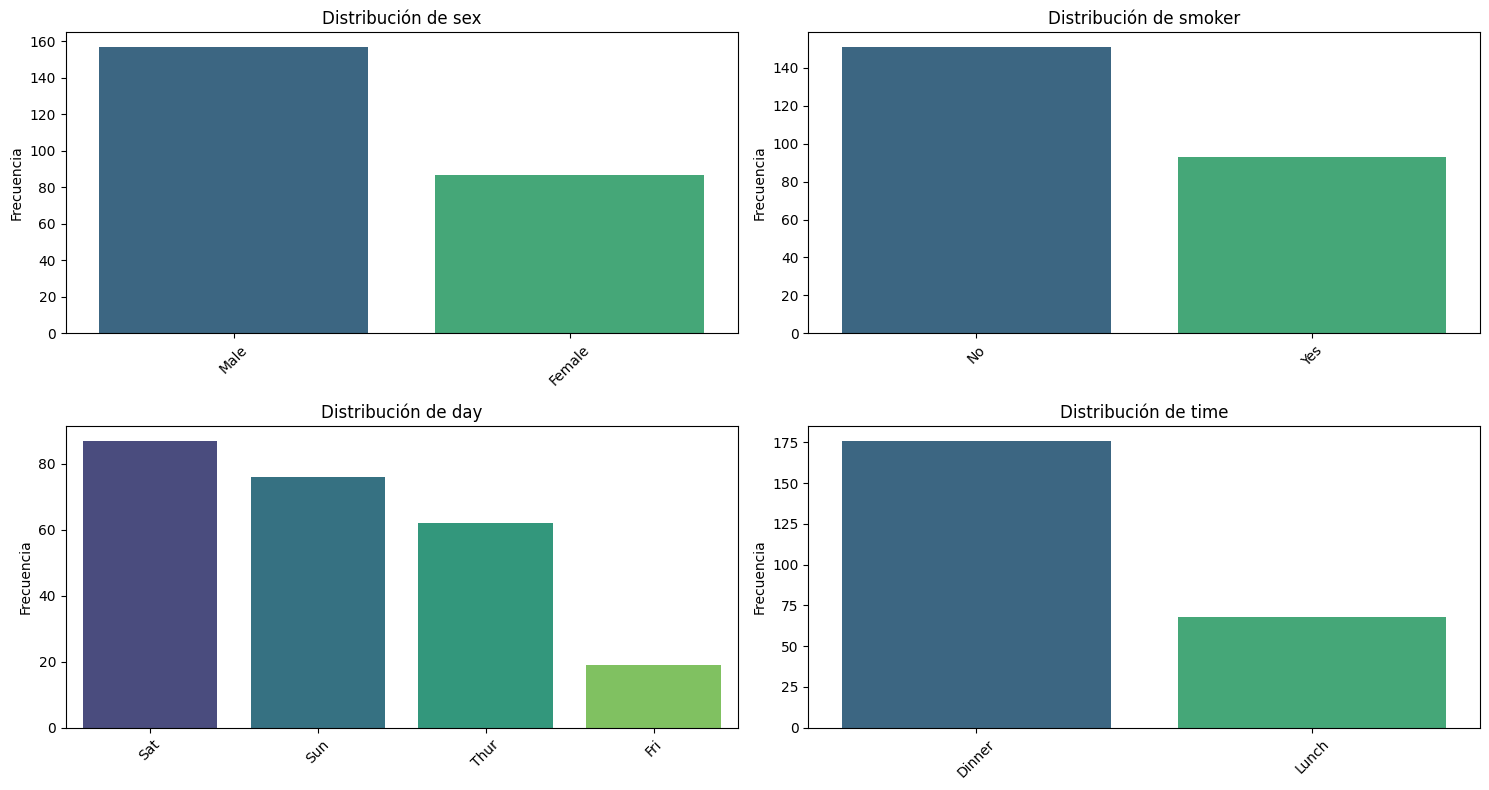

In [128]:
pinta_distribucion_categoricas(df_tips, columnas_categoricas_tips)

In [129]:
# Frenceuncias relativas de las variables categóricas
for catego in columnas_categoricas_tips:
    print(f"Para {catego}")
    print(df_tips[catego].value_counts()/len(df_tips)*100)
    print("\n"*2)

Para sex
sex
Male      64.344262
Female    35.655738
Name: count, dtype: float64



Para smoker
smoker
No     61.885246
Yes    38.114754
Name: count, dtype: float64



Para day
day
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: count, dtype: float64



Para time
time
Dinner    72.131148
Lunch     27.868852
Name: count, dtype: float64





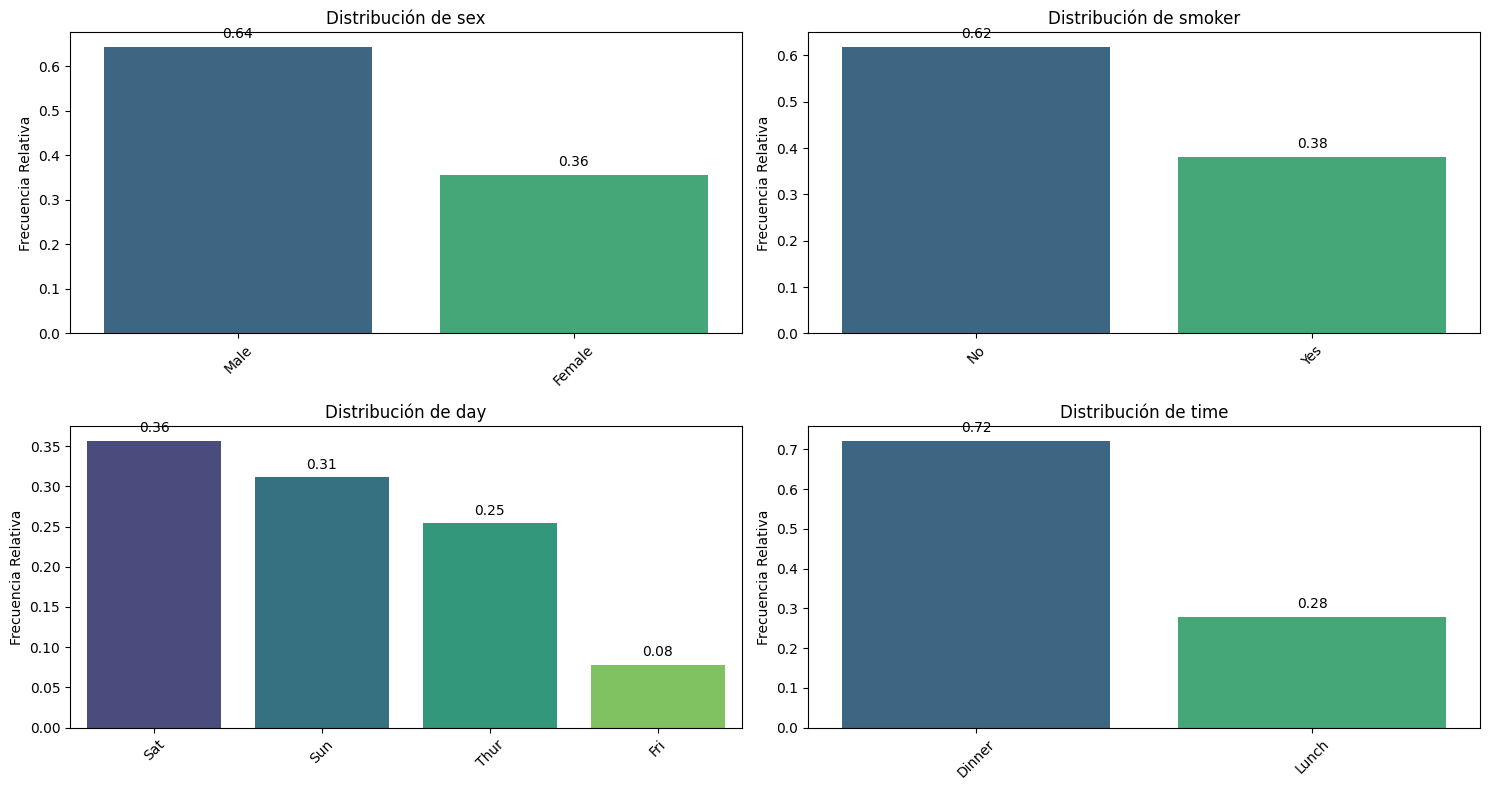

In [130]:
# Frecuencias relativa en gráfico
pinta_distribucion_categoricas(df_tips, columnas_categoricas_tips, relativa=True, mostrar_valores=True)

### Ejercicio Extra #2:

Carga en un dataframe el dataset de los seguros que tanto conoces ya ("./data/Marketing-Customer-Analysis.csv") y analiza cual es el perfil típico del cliente de la compañía a partir de las variables categóricas siguientes: `education, state, employmentstatus, gender, marital_status, vehicle_class, vehicle_size`. (Nota: en el workout lo hicimos a partir de las modas de dichos valores, pero no es la forma "precisa" de hacerlo, piensa en la "moda" sí pero de la combinación de valores)


In [131]:
df_marketing = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_marketing.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [138]:
# Columnas categoricas
variables_categoricas_marketing = ["education","state", "employmentstatus", "gender", "marital_status", "vehicle_class", "vehicle_size"]

In [133]:
# Columnas numéricas
columnas_numericas_marketing = df_marketing.describe().T.index.to_list()
print(columnas_numericas_marketing)

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


In [134]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [135]:
df_marketing.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
# Frecuncia absoluta
for catego in variables_categoricas_marketing:
    print(f"Para {catego}")
    print(df_marketing[catego].value_counts())
    print("\n"*2)

Para education
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64



Para state
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64



Para employmentstatus
employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64



Para gender
gender
F    4658
M    4476
Name: count, dtype: int64



Para marital_status
marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64



Para vehicle_class
vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64



Para vehicle_size
vehicle_size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64


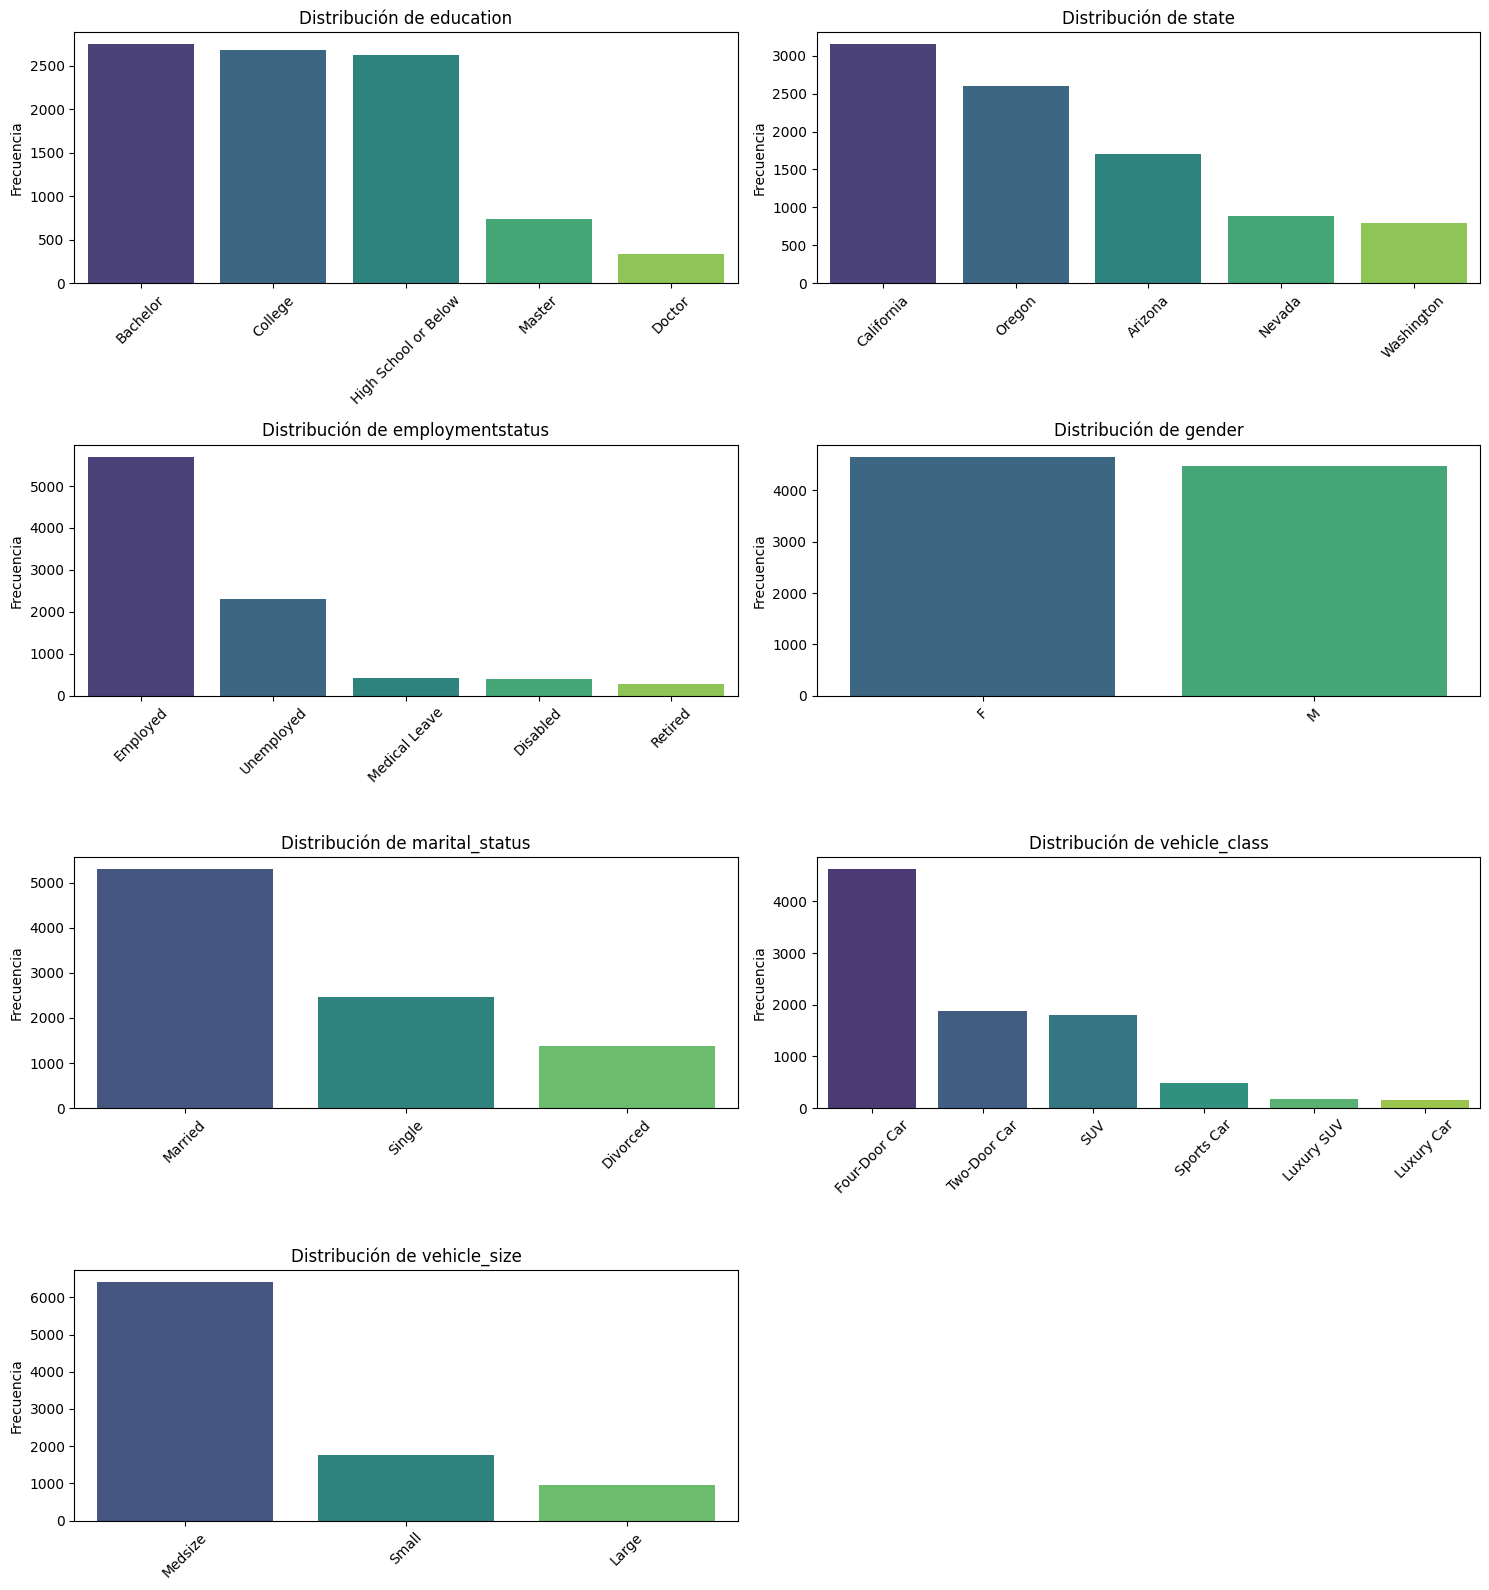

In [ ]:
# Frecuencia absoluta en gráfico
pinta_distribucion_categoricas(df_marketing, variables_categoricas_marketing)

In [ ]:
# Frecuencia relativa
for catego in variables_categoricas_marketing:
    print(f"Para {catego}")
    print(df_marketing[catego].value_counts()/len(df_marketing)*100)
    print("\n"*2)

Para education
education
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: count, dtype: float64



Para state
state
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: count, dtype: float64



Para employmentstatus
employmentstatus
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: count, dtype: float64



Para gender
gender
F    50.996278
M    49.003722
Name: count, dtype: float64



Para marital_status
marital_status
Married     58.003065
Single      27.008977
Divorced    14.987957
Name: count, dtype: float64



Para vehicle_class
vehicle_class
Four-Door Car    50.591198
Two-Door Car     20.648128
SUV              19.662798
Sports Car        5.298883
Luxury SUV        2.014451
Luxury Car        1.7

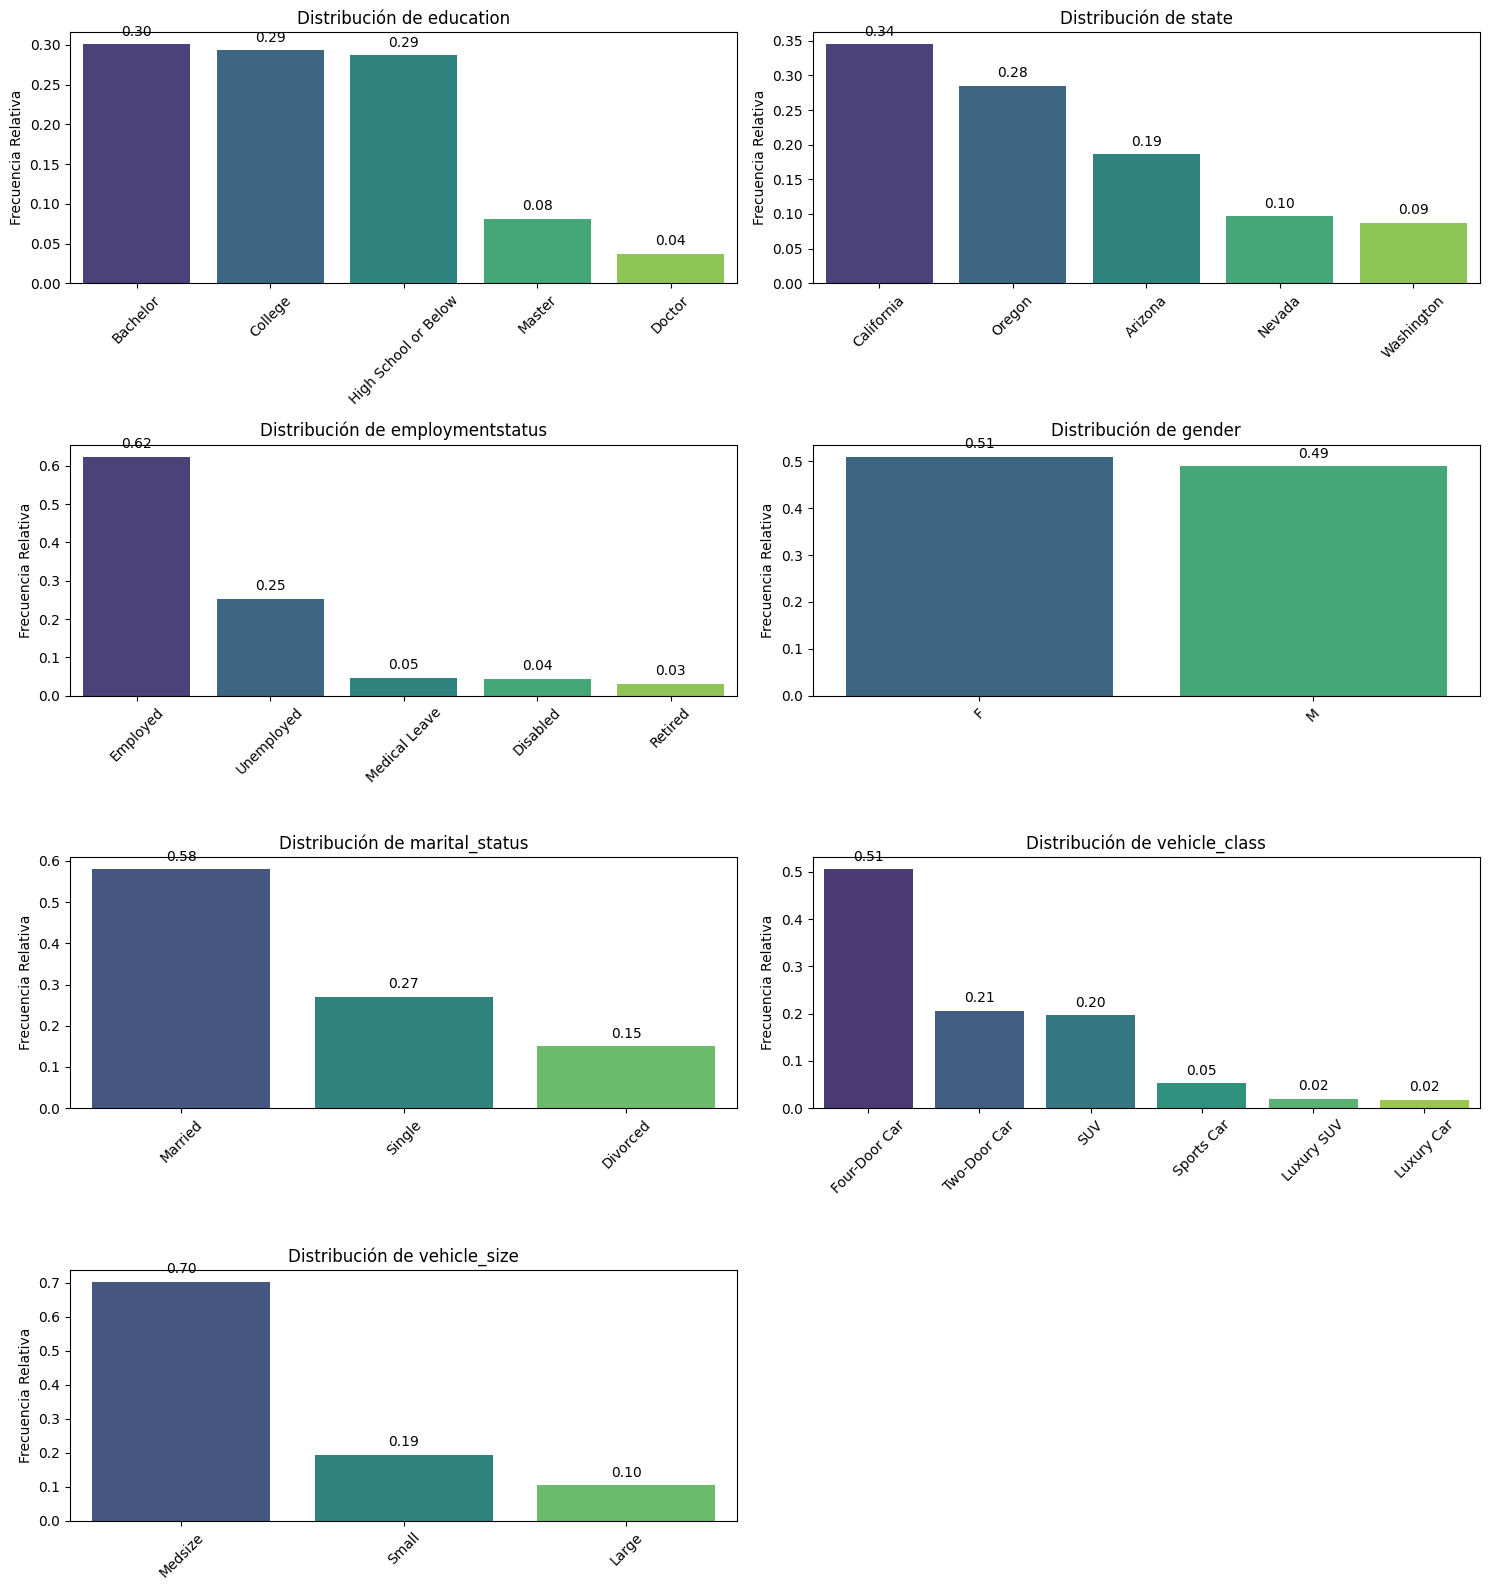

In [143]:
# Frecuencia relativa en gráfico
pinta_distribucion_categoricas(df_marketing, variables_categoricas_marketing, relativa = True, mostrar_valores=True)

In [144]:
# IQR
get_IQR(df_marketing, columnas_numericas_marketing)

customer_lifetime_value           4967.915247
income                           62320.000000
monthly_premium_auto                41.000000
months_since_last_claim             17.000000
months_since_policy_inception       47.000000
number_of_open_complaints            0.000000
number_of_policies                   3.000000
total_claim_amount                 275.256594
dtype: float64

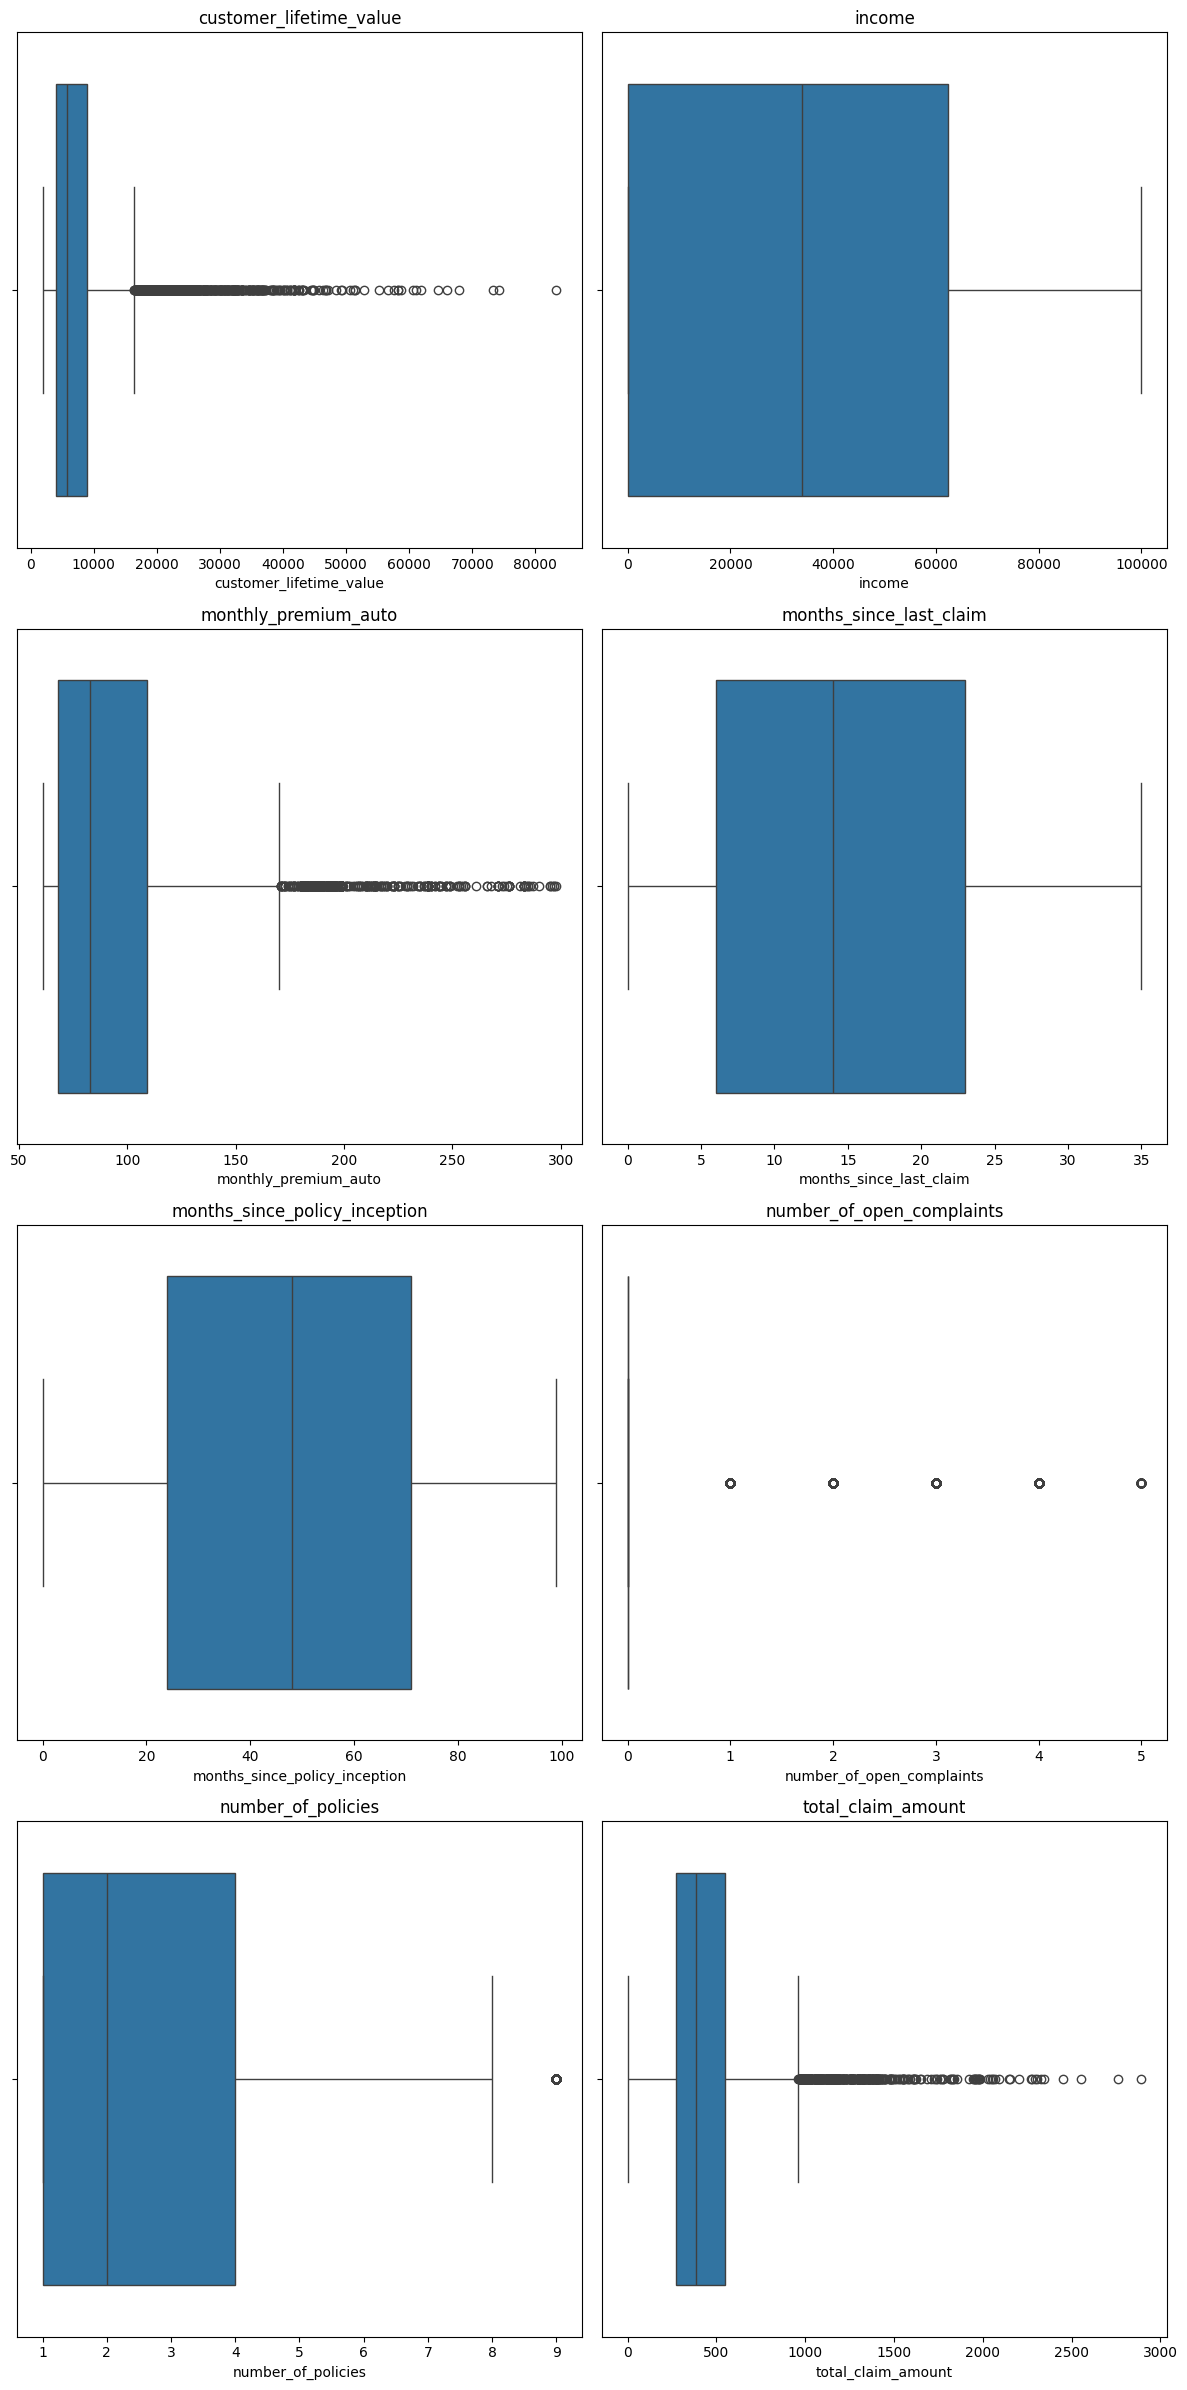

In [146]:
# IQR en gráfico
plot_multiple_boxplots(df_marketing, columnas_numericas_marketing)

In [147]:
# Perfil típico del cliente (forma precisa - moda de la combinación)
cliente_tipico = df_marketing[variables_categoricas_marketing].mode().iloc[0]
print("Perfil típico del cliente:")
print(cliente_tipico)


Perfil típico del cliente:
education                Bachelor
state                  California
employmentstatus         Employed
gender                          F
marital_status            Married
vehicle_class       Four-Door Car
vehicle_size              Medsize
Name: 0, dtype: object


In [148]:
# Top 5 combinaciones más frecuentes de características
combinaciones = df_marketing.groupby(variables_categoricas_marketing).size().sort_values(ascending=False)
print("Top 5 combinaciones más frecuentes:")
print(combinaciones.head())


Top 5 combinaciones más frecuentes:
education  state       employmentstatus  gender  marital_status  vehicle_class  vehicle_size
College    California  Employed          F       Married         Four-Door Car  Medsize         79
           Oregon      Employed          F       Married         Four-Door Car  Medsize         78
Bachelor   California  Employed          F       Married         Four-Door Car  Medsize         76
College    California  Employed          M       Married         Four-Door Car  Medsize         75
Bachelor   California  Employed          M       Married         Four-Door Car  Medsize         72
dtype: int64
